In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm


%matplotlib inline

In [2]:
## Load file
data = pd.read_csv('cost_revenue.csv')

In [3]:
data.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [4]:
data.tail()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [5]:
data.describe()

,Rank
count,5391.000000
mean,2696.000000
std,1556.391981
min,1.000000
25%,1348.500000
50%,2696.000000
75%,4043.500000
max,5391.000000


### Feature Engineering and EDA (Exploratory Data Analysis)

In [6]:
### Drop unnecessary columns
data.drop(['Rank', 'Release Date', 'Movie Title', 'Domestic Gross ($)'], axis=1, inplace=True)

In [7]:
data.head()

,Production Budget ($),Worldwide Gross ($)
0,"$110,000","$11,000,000"
1,"$385,907",$0
2,"$200,000","$8,000,000"
3,"$100,000","$3,000,000"
4,"$245,000","$22,000,000"


In [8]:
data.tail()

,Production Budget ($),Worldwide Gross ($)
5386,"$15,000,000",$0
5387,"$160,000,000",$0
5388,"$175,000,000",$0
5389,"$50,000,000",$0
5390,"$20,000,000",$0


In [9]:
## Handling the 'Production Budget ($)'

data['Production Budget ($)'].head().unique()

array(['$110,000', '$385,907', '$200,000', '$100,000', '$245,000'],
      dtype=object)

In [10]:
data['Production Budget ($)'].isnull().sum()

0

In [11]:
data['Production Budget ($)'] = data['Production Budget ($)'].str.replace('$', '')

In [12]:
data['Production Budget ($)']

0           110,000
1           385,907
2           200,000
3           100,000
4           245,000
           ...     
5386     15,000,000
5387    160,000,000
5388    175,000,000
5389     50,000,000
5390     20,000,000
Name: Production Budget ($), Length: 5391, dtype: object

In [13]:
data['Production Budget ($)'] = data['Production Budget ($)'].str.replace(',', '')

In [14]:
data['Production Budget ($)']

0          110000
1          385907
2          200000
3          100000
4          245000
          ...    
5386     15000000
5387    160000000
5388    175000000
5389     50000000
5390     20000000
Name: Production Budget ($), Length: 5391, dtype: object

In [15]:
## Handling the 'Production Budget ($)'

data['Worldwide Gross ($)'].unique()

array(['$11,000,000', '$0', '$8,000,000', ..., '$561,137,727',
       '$140,012,608', '$57,850,343'], dtype=object)

In [16]:
data['Worldwide Gross ($)'].isnull().sum()

0

In [17]:
data['Worldwide Gross ($)'] = data['Worldwide Gross ($)'].str.replace('$', '')

In [18]:
data['Worldwide Gross ($)'] = data['Worldwide Gross ($)'].str.replace(',', '')

In [19]:
data['Worldwide Gross ($)']

0       11000000
1              0
2        8000000
3        3000000
4       22000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: Worldwide Gross ($), Length: 5391, dtype: object

In [20]:
data

,Production Budget ($),Worldwide Gross ($)
0,110000,11000000
1,385907,0
2,200000,8000000
3,100000,3000000
4,245000,22000000
...,...,...
5386,15000000,0
5387,160000000,0
5388,175000000,0
5389,50000000,0


In [21]:
### Check for duplicate
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5386     True
5387    False
5388    False
5389    False
5390     True
Length: 5391, dtype: bool

In [22]:
data.duplicated().sum()

250

In [23]:
data_no_duplicate = data.drop_duplicates()

In [24]:
data_no_duplicate

,Production Budget ($),Worldwide Gross ($)
0,110000,11000000
1,385907,0
2,200000,8000000
3,100000,3000000
4,245000,22000000
...,...,...
5384,103000000,0
5385,100000000,0
5387,160000000,0
5388,175000000,0


In [25]:
###  delete rows that have multiple zeros in different places 


# Step 1: Ensure zeros are properly identified (handle 0 as integer and float)
# This step converts possible string '0' or float 0.0 to integer 0

df = data_no_duplicate.apply(pd.to_numeric, errors='coerce')

# Step 2: Filter out rows that contain any zeros (both integer 0 and float 0.0)
df_filtered = df[(df != 0).all(axis=1)]

# Step 3 View or save the filtered DataFrame
print(df_filtered)

      Production Budget ($)  Worldwide Gross ($)
0                    110000             11000000
2                    200000              8000000
3                    100000              3000000
4                    245000             22000000
5                   3900000              9000000
...                     ...                  ...
5378               55000000            376856949
5379               40000000            166893990
5380              185000000            561137727
5381              175000000            140012608
5382               42000000             57850343

[5032 rows x 2 columns]


In [26]:
## Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('filtered_dataset.csv', index=False)

In [27]:
df_filtered.describe()

,Production Budget ($),Worldwide Gross ($)
count,5.032000e+03,5.032000e+03
mean,3.292048e+07,9.519149e+07
std,4.112917e+07,1.726268e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.297476e+07
75%,4.200000e+07,1.035105e+08
max,4.250000e+08,2.783919e+09


In [28]:
X = pd.DataFrame(df_filtered, columns= ['Production Budget ($)']) 
y = pd.DataFrame(df_filtered, columns= ['Worldwide Gross ($)']) 

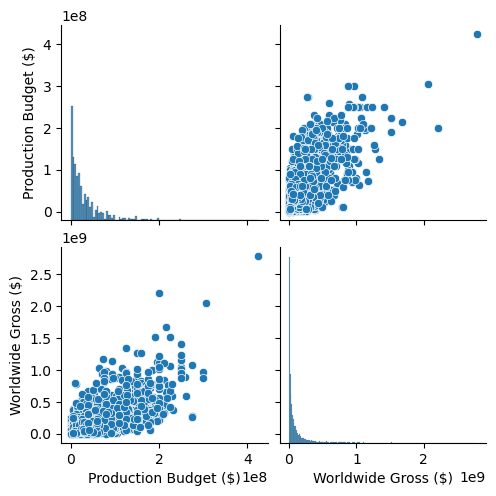

In [29]:
## Visualization
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df_filtered)

In [30]:
df_filtered.corr()

,Production Budget ($),Worldwide Gross ($)
Production Budget ($),1.000000,0.741353
Worldwide Gross ($),0.741353,1.000000


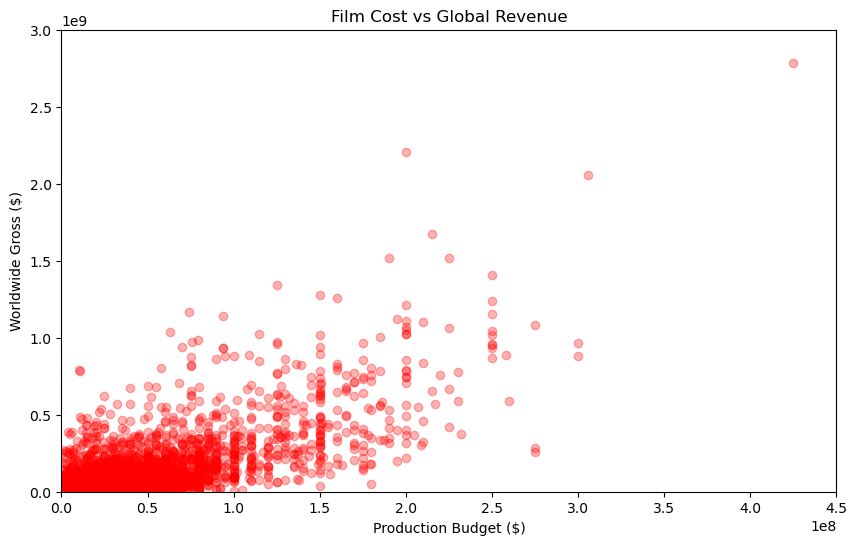

In [31]:
# visualize data point
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='r', alpha=0.3)
plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

In [32]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

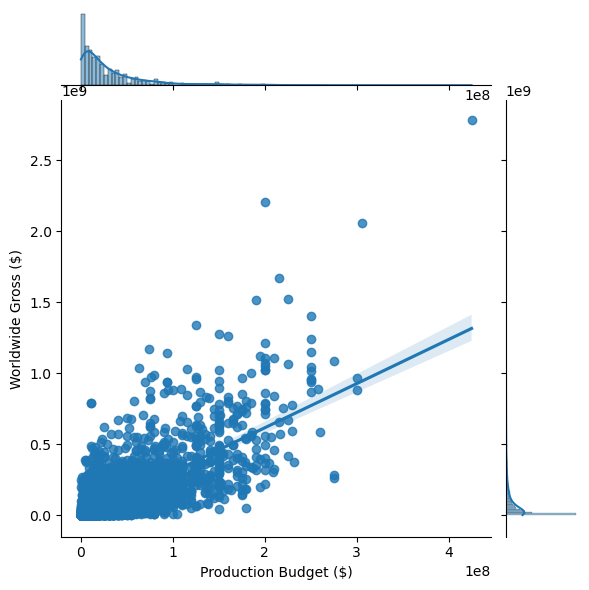

In [33]:
sns.jointplot(df_filtered, x='Production Budget ($)', y='Worldwide Gross ($)', kind="reg")

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
X_train

array([[-0.78442485],
       [ 0.16668278],
       [-0.48016624],
       ...,
       [ 0.58593678],
       [-0.74848879],
       [ 0.4062565 ]])

In [36]:
X_test

array([[-0.83067691],
       [-0.45206703],
       [-0.42613485],
       ...,
       [-0.81252438],
       [-0.63359232],
       [ 0.04064446]])

In [37]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [38]:
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error',
                                  cv=3)

In [39]:
validation_score

array([-1.31584429e+16, -1.25956004e+16, -1.66947535e+16])

In [40]:
np.mean(validation_score) # mean validation Score

-1.4149598944821826e+16

In [41]:
## Prediction
y_pred = regression.predict(X_test)

In [42]:
y_pred

array([[-1.43441716e+07],
       [ 3.59126727e+07],
       [ 3.93549223e+07],
       ...,
       [-1.19345968e+07],
       [ 1.18169255e+07],
       [ 1.01315415e+08]])

In [43]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 1.1563390496832658e+16
Mean Absolute Error: 65533307.374976136
Root Mean Squared Error: 107533206.48447463


In [44]:
score = r2_score(y_test, y_pred)
print(score)
### Display adjustmwnt R-squared
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.48594386697720027
0.4854323683373766


### Assumptions 

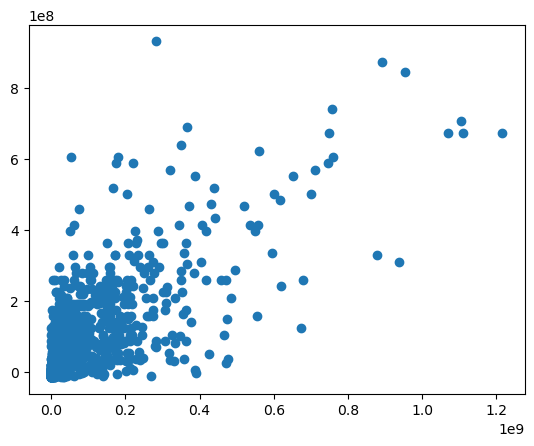

In [45]:
plt.scatter(y_test, y_pred)

In [46]:
residuals = y_test - y_pred
print(f"Residuals: {residuals}")

Residuals:       Worldwide Gross ($)
2240         1.550619e+07
1814        -2.753453e+07
3189         2.081196e+08
4522        -8.740293e+07
5202        -1.646058e+08
...                   ...
1968        -6.848580e+06
646         -4.393156e+05
469          1.329032e+07
1563        -3.537908e+06
1427        -8.702342e+07

[1007 rows x 1 columns]


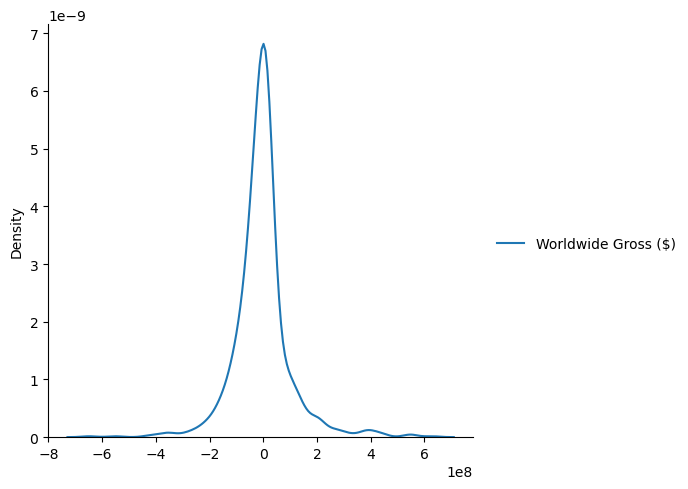

In [47]:
## plot the residuals
sns.displot(residuals, kind='kde')
plt.show()

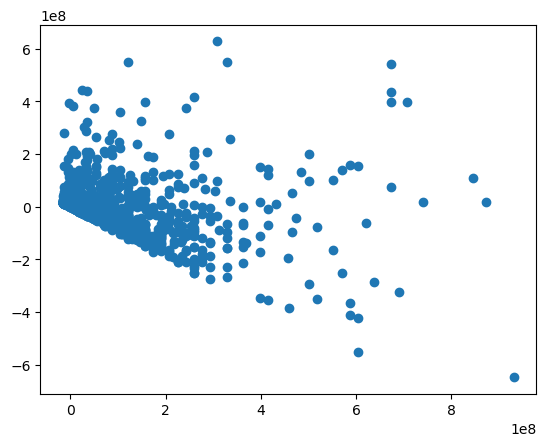

In [48]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [49]:
model = sm.OLS(y_train, X_train).fit()

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Worldwide Gross ($)   R-squared (uncentered):                  55.078
Model:                             OLS   Adj. R-squared (uncentered):             55.091
Method:                  Least Squares   F-statistic:                             -4098.
Date:                 Sun, 13 Oct 2024   Prob (F-statistic):                        1.00
Time:                         14:21:14   Log-Likelihood:                         -81548.
No. Observations:                 4025   AIC:                                  1.631e+05
Df Residuals:                     4024   BIC:                                  1.631e+05
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.327e+08    2.4e+06     55.285      0.000    1.28e+08    1.37e+08
==============================================================================
Omnibus:                     3112.923   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           131856.337
Skew:                           3.297   Prob(JB):                         0.00
Kurtosis:                      30.253   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""